In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cd = pd.read_excel('Customer_Churn_Data_Large.xlsx', sheet_name='Customer_Demographics')
cs = pd.read_excel('Customer_Churn_Data_Large.xlsx', sheet_name='Customer_Service')
th = pd.read_excel('Customer_Churn_Data_Large.xlsx', sheet_name='Transaction_History')

In [3]:
# Data Cleaning

In [4]:
#th[th['TransactionID'].duplicated(keep=False)].head()

#th[th['TransactionID'] == 7194]

# this shows date quality issues
# drop TransactionID

In [5]:
#cs[cs['InteractionID'].duplicated(keep=False)].head()
#cs[cs['InteractionID'] == 2358]

#Same data quality issues here
# drop InteractionID

In [6]:
th = th.drop(columns='TransactionID')
cs = cs.drop(columns='InteractionID')

In [7]:
# Exploratory Data Analysis on cd, th, cs

In [8]:
# Customer Demographics

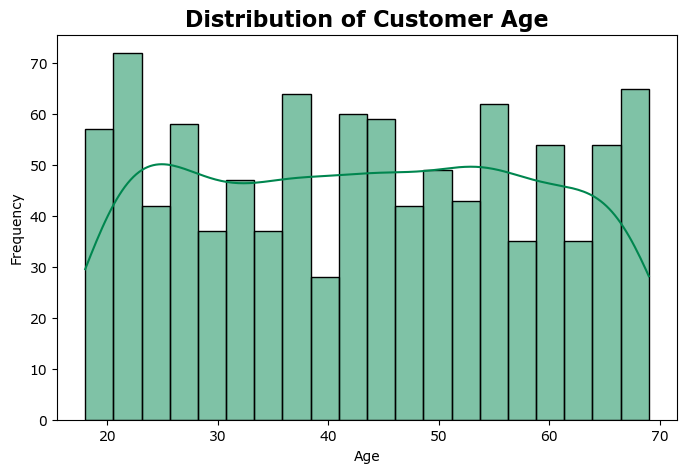

In [9]:
plt.figure(figsize=(8,5))
sns.histplot(
    cd['Age'],
    bins=20,
    kde=True,
    color='#00864F'
)

plt.title('Distribution of Customer Age', fontsize=16, weight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

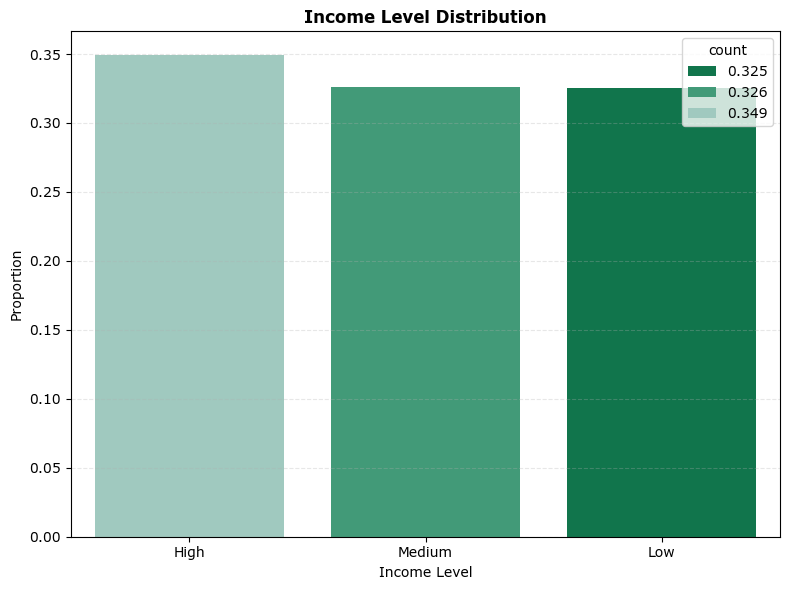

In [10]:
inc_lv = cd.IncomeLevel.value_counts()/cd.IncomeLevel.count()

palette = ['#00864F', '#33A97B', '#99D0C3']
plt.figure(figsize=(8,6))
sns.barplot(
    x=inc_lv.index,
    y=inc_lv.values,
    palette=palette,
    hue=inc_lv
)
plt.title('Income Level Distribution', weight='bold')
plt.xlabel('Income Level')
plt.ylabel('Proportion')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [11]:
# High-income customers are the highest with a proportion of 35% outnumbering medium and low income customers.

In [12]:
# Transaction History

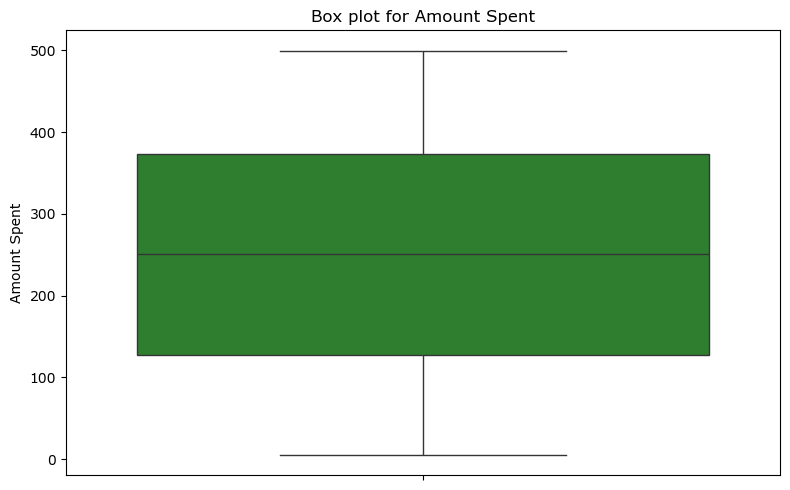

In [13]:
plt.figure(figsize=(8,5))

sns.boxplot(th['AmountSpent'], color='forestgreen')
plt.title('Box plot for Amount Spent')
plt.ylabel('Amount Spent')
plt.tight_layout()
plt.show()

In [14]:
mon = th['TransactionDate'].dt.to_period('M').dt.strftime('%B %Y')
high = th.groupby(mon)['AmountSpent'].sum()
high.idxmax()

'May 2022'

In [15]:
mon = th['TransactionDate'].dt.to_period('M').dt.strftime('%b %Y')
high = th.groupby(mon)['AmountSpent'].sum()
print(f"{high.idxmax()} recorded peak spending activity")

month = th['TransactionDate'].dt.to_period('M')
trend = th.groupby(month)['AmountSpent'].sum()
trend

May 2022 recorded peak spending activity


TransactionDate
2022-01    106751.13
2022-02     93298.29
2022-03    109112.41
2022-04    101904.86
2022-05    113049.43
2022-06    104553.83
2022-07    112240.73
2022-08    109784.25
2022-09    105097.87
2022-10    103325.79
2022-11    104968.08
2022-12    102988.28
Freq: M, Name: AmountSpent, dtype: float64

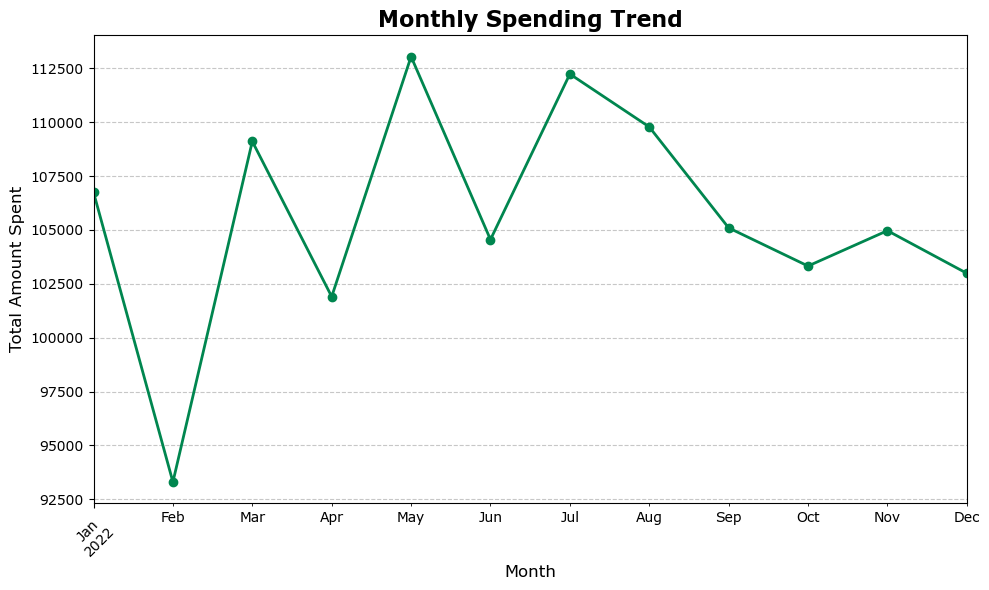

In [16]:
plt.figure(figsize=(10, 6))
trend.plot(
    marker='o',
    linewidth=2,
    color='#00864F'
)
plt.title(
    'Monthly Spending Trend',
     fontweight='bold',
     fontsize=16
)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Amount Spent', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
why_may = th.groupby([month, 'ProductCategory'])['AmountSpent'].sum().sort_values(ascending=False)

In [18]:
# May 2022 recorded peak spending activity
# Electronic and Furniture were the sales drivers in May

In [19]:
print('Books are the most frequently purchased product category')
th.ProductCategory.value_counts()

Books are the most frequently purchased product category


ProductCategory
Books          1041
Groceries      1020
Electronics    1001
Clothing       1000
Furniture       992
Name: count, dtype: int64

In [20]:
cat = th.groupby('ProductCategory')['AmountSpent'].sum().sort_values(ascending=False)
cat

ProductCategory
Groceries      261133.65
Books          259564.99
Clothing       252450.70
Electronics    249139.79
Furniture      244785.82
Name: AmountSpent, dtype: float64

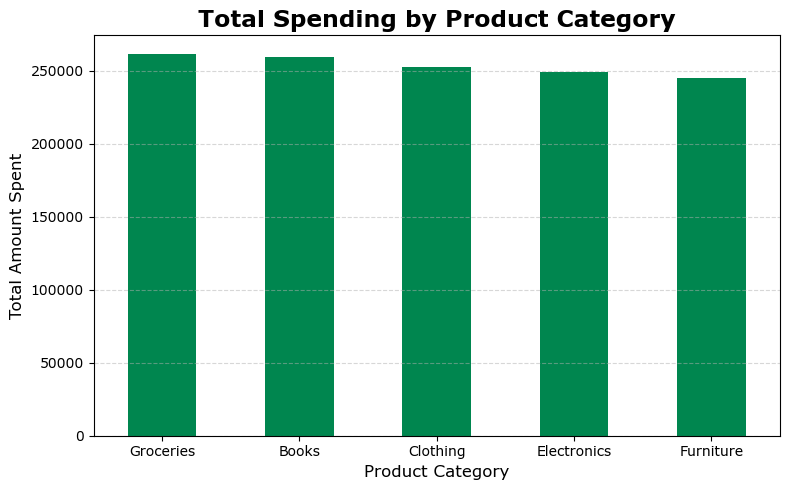

In [21]:
plt.figure(figsize=(8, 5))
cat.plot(
    kind='bar',
    color='#00864F'
)
plt.title(
    'Total Spending by Product Category',
    fontweight='bold',
    fontsize=17
)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Amount Spent', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [22]:
# Groceries emerge as the leading category driving overall sales.

In [23]:
# Customer Service

In [24]:
r_status = cs.ResolutionStatus.value_counts(normalize=True)
r_status.round(2)

ResolutionStatus
Resolved      0.52
Unresolved    0.48
Name: proportion, dtype: float64

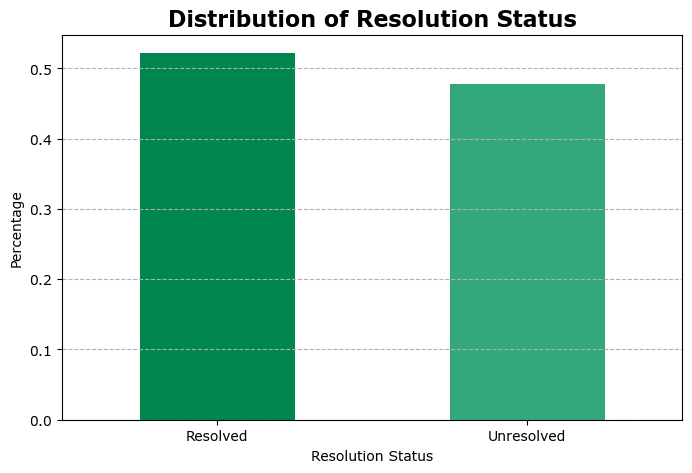

In [25]:
palette = ['#00864F', '#33A97B', '#99D0C3']

plt.figure(figsize=(8,5))
r_status.plot(
    kind='bar',
    color=palette
)

plt.title(
    'Distribution of Resolution Status',
    fontsize=16,
    weight='bold'
)
plt.xlabel('Resolution Status')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

In [26]:
# There are slightly more resolved cases than unresolved ones.

In [27]:
print(cd.columns)
print(th.columns)
print(cs.columns)

Index(['CustomerID', 'Age', 'Gender', 'MaritalStatus', 'IncomeLevel'], dtype='object')
Index(['CustomerID', 'TransactionDate', 'AmountSpent', 'ProductCategory'], dtype='object')
Index(['CustomerID', 'InteractionDate', 'InteractionType', 'ResolutionStatus'], dtype='object')


In [28]:
# Prepare cd th and cs for merging

In [29]:
cd = cd.rename(columns={
    'MaritalStatus': 'Marital_Status',
    'IncomeLevel': 'Income_Level'
})

In [30]:
# Aggregrate Transaction History

th_agg = th.groupby('CustomerID').agg({
    'AmountSpent': ['sum','mean','count'],
    'TransactionDate': 'max',
    'ProductCategory': 'nunique'
}).reset_index()

th_agg.columns = ['CustomerID','Total_Spend','Avg_Spend','Num_Transactions', 'Last_TxnDate','Unique_Categories']

In [31]:
print(cd.columns)
print(th_agg.columns)
print(cs.columns)

Index(['CustomerID', 'Age', 'Gender', 'Marital_Status', 'Income_Level'], dtype='object')
Index(['CustomerID', 'Total_Spend', 'Avg_Spend', 'Num_Transactions',
       'Last_TxnDate', 'Unique_Categories'],
      dtype='object')
Index(['CustomerID', 'InteractionDate', 'InteractionType', 'ResolutionStatus'], dtype='object')


In [32]:
# Aggregrate Customer Service

cs_agg = cs.groupby('CustomerID').agg(
    Num_Interactions=('InteractionType', 'count'),
    Num_Inquiries=('InteractionType', lambda x: (x == 'Inquiry').sum()),
    Num_Feedback=('InteractionType', lambda x: (x == 'Feedback').sum()),
    Num_Complaints=('InteractionType', lambda x: (x == 'Complaint').sum()),
    Num_Resolved=('ResolutionStatus', lambda x: (x == 'Resolved').sum()),
    Num_Unresolved=('ResolutionStatus', lambda x: (x == 'Unresolved').sum()),
    Last_Interaction_Date=('InteractionDate', 'max')
).reset_index()

In [33]:
# Data prepared, Time to merge all cd, th_agg, and cs_agg

In [34]:
df = cd.merge(th_agg, on='CustomerID', how='left').merge(cs_agg, on='CustomerID', how='left')

In [35]:
# Fill numeric NaN columns with 0
df = df.fillna({'Num_Interactions': 0,
                'Num_Resolved': 0,
                'Num_Unresolved': 0,
                'Num_Complaints': 0,
                'Num_Feedback': 0,
                'Num_Inquiries': 0})

In [36]:
today = pd.Timestamp.today().normalize()

# Get days since last interaction into a new column
df['Days_Since_Last_Interaction'] = (today - df['Last_Interaction_Date']).dt.days

# replace NaT with a large number (meaning "no interaction for a long time")
df['Days_Since_Last_Interaction'] = df['Days_Since_Last_Interaction'].fillna(9999)

In [37]:
# It is safe to now drop Last_Interaction_Date since we have gotten days from it

In [38]:
df = df.drop(columns='Last_Interaction_Date', axis=1)

In [39]:
# EDA on our merged dataset

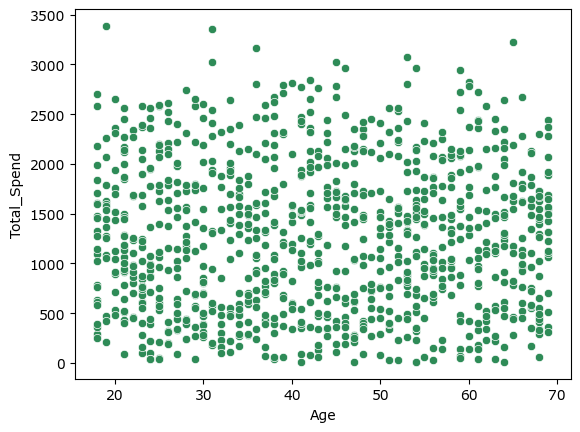

In [40]:
sns.scatterplot(
    x='Age',
    y='Total_Spend',
    data=df,
    color='seagreen'
)
plt.show()

In [41]:
bins = [0, 18, 25, 35, 45, 55, 65, 70]
labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65-70']
AgeGroup= pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_spend = df.groupby(AgeGroup)['Total_Spend'].sum()
age_spend

Age
<18           0.00
18-24    185903.46
25-34    226426.71
35-44    245634.34
45-54    252796.60
55-64    234003.72
65-70    122310.12
Name: Total_Spend, dtype: float64

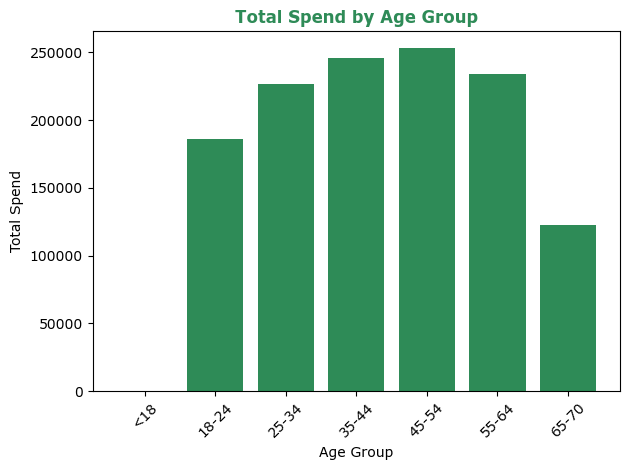

In [42]:
plt.bar(
    age_spend.index,
    age_spend.values,
    color='seagreen'
)
plt.xlabel('Age Group')
plt.ylabel('Total Spend')
plt.title(
    'Total Spend by Age Group',
    color='seagreen',
    weight='bold'
)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [43]:
incomelevel_spend = df.groupby('Income_Level')['Total_Spend'].sum()
incomelevel_spend

Income_Level
High      434659.66
Low       413122.75
Medium    419292.54
Name: Total_Spend, dtype: float64

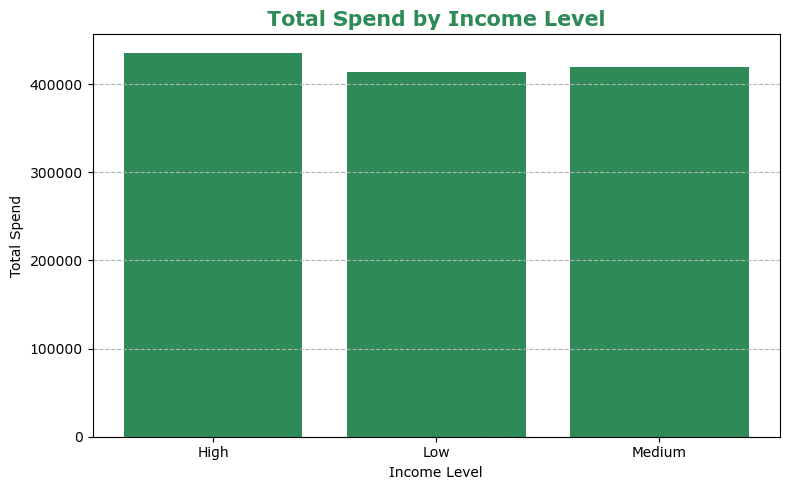

In [44]:
plt.figure(figsize=(8,5))
plt.bar(
    incomelevel_spend.index,
    incomelevel_spend.values,
    color='seagreen'
)
plt.xlabel('Income Level')
plt.ylabel('Total Spend')
plt.title(
    'Total Spend by Income Level',
    color='seagreen',
    weight='bold',
    fontsize=15
)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [45]:
# High-income customers are the top spenders.

In [46]:
incomelevel_tranx_num = df.groupby('Income_Level')['Num_Transactions'].sum()
incomelevel_tranx_num

Income_Level
High      1746
Low       1645
Medium    1663
Name: Num_Transactions, dtype: int64

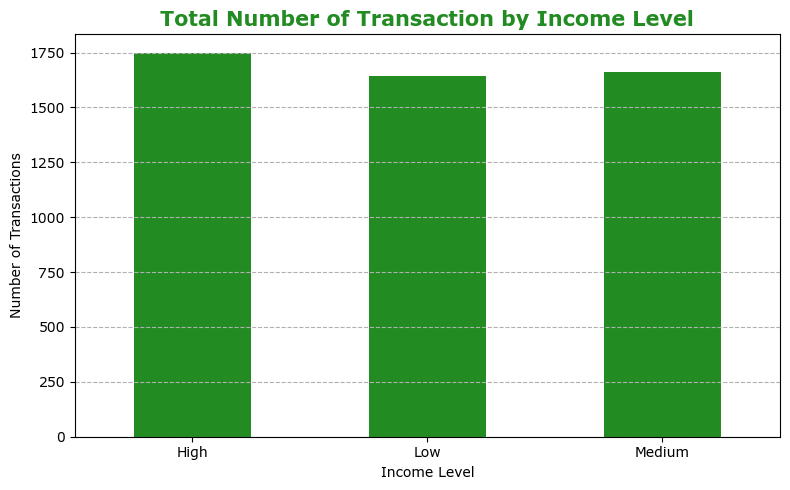

In [47]:
plt.figure(figsize=(8,5))
incomelevel_tranx_num.plot(
    kind='bar',
    color='forestgreen'
)
plt.xlabel('Income Level')
plt.ylabel('Number of Transactions')
plt.title(
    'Total Number of Transaction by Income Level',
    color='forestgreen',
    weight='bold',
    fontsize=15
)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [48]:
# High-income level customers account for the largest volume of transactions.

In [49]:
df_corr = df[['Age', 'Total_Spend', 'Avg_Spend', 'Num_Transactions',
       'Unique_Categories', 'Num_Inquiries',
       'Num_Feedback', 'Num_Complaints', 'Num_Resolved', 'Num_Unresolved']]
corr_matrix = df_corr.corr()

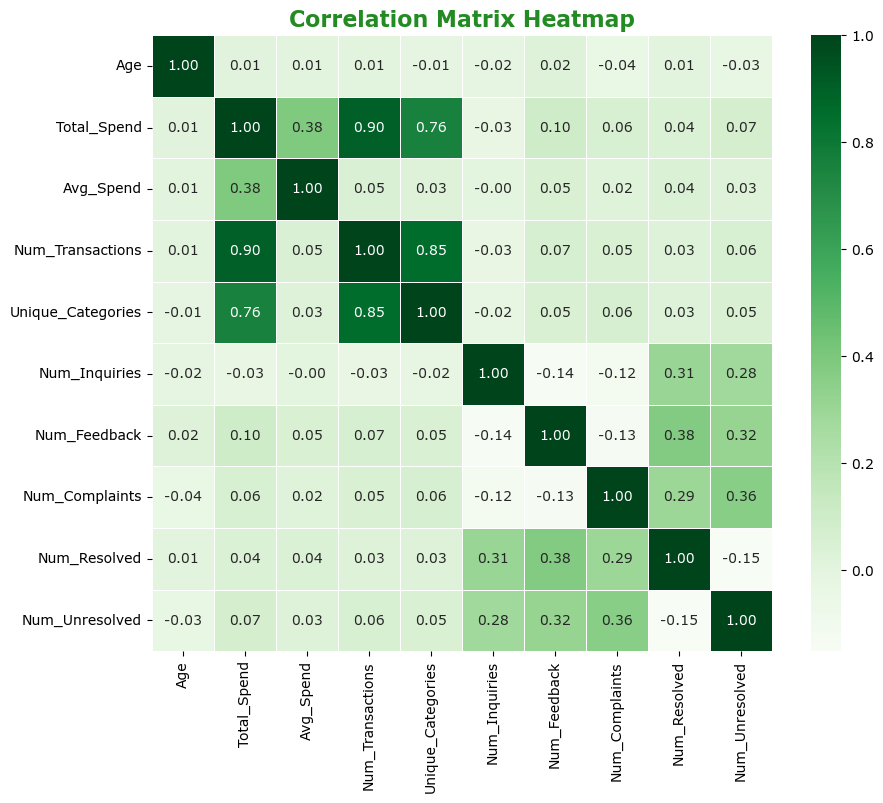

In [50]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='Greens',
    fmt=".2f",
    linewidths=0.5
)
plt.title(
    'Correlation Matrix Heatmap',
    fontsize=16,
    color='forestgreen',
    weight='bold'
)
plt.show()

In [51]:
print("""
Summary:
The selected datasets are customer demographics, transaction history, and customer service—providing key information for predictive churn analysis.
Datasets were cleaned, with quality issues in transaction history and customer service addressed.
Derived features were created: Total Spend, Avg Spend, Number of Transactions, Unique Categories, Last Transaction Recency.
EDA revealed key patterns: High-income customers make up the largest share (35%), men are more common in this segment, age distribution shows no outliers.
Strong positive correlations between total spend, number of transactions, and unique categories suggest higher engagement drives greater spend and wider variety of products purchased.
""")


Summary:
The selected datasets are customer demographics, transaction history, and customer service—providing key information for predictive churn analysis.
Datasets were cleaned, with quality issues in transaction history and customer service addressed.
Derived features were created: Total Spend, Avg Spend, Number of Transactions, Unique Categories, Last Transaction Recency.
EDA revealed key patterns: High-income customers make up the largest share (35%), men are more common in this segment, age distribution shows no outliers.
Strong positive correlations between total spend, number of transactions, and unique categories suggest higher engagement drives greater spend and wider variety of products purchased.



In [258]:
dfs = df.copy()
dfs.head(2)

,CustomerID,Age,Gender,Marital_Status,Income_Level,Total_Spend,Avg_Spend,Num_Transactions,Last_TxnDate,Unique_Categories,Num_Interactions,Num_Inquiries,Num_Feedback,Num_Complaints,Num_Resolved,Num_Unresolved,Days_Since_Last_Interaction
0,1,62,M,Single,Low,416.50,416.50,1,2022-03-27,1,1.0,1.0,0.0,0.0,1.0,0.0,1239.0
1,2,65,M,Married,Low,1547.42,221.06,7,2022-11-19,4,1.0,1.0,0.0,0.0,1.0,0.0,1253.0


In [259]:
#reference date for end of tranx date in dataset

ref_date = pd.to_datetime('2022-12-31')

dfs['Days_Since_Last_Transaction'] = (ref_date - df['Last_TxnDate']).dt.days

dfs['Churn'] = (dfs['Days_Since_Last_Transaction'] > 180).astype(int)


In [249]:
# Build a model

In [260]:
dfs['Gender'] = dfs['Gender'].map({'M': 0, 'F': 1})

In [261]:
# One-Hot encode Marital Status and Income Level

dfs = pd.get_dummies(dfs, columns=['Marital_Status', 'Income_Level'], drop_first=True)

In [262]:
# Drop columns that are not useful

dfs = dfs.drop(columns=['CustomerID', 'Last_TxnDate', 'Days_Since_Last_Transaction'])


In [263]:
from sklearn.model_selection import train_test_split

X = dfs[['Age', 'Gender', 'Total_Spend', 'Avg_Spend',
       'Num_Transactions', 'Unique_Categories',
       'Num_Interactions', 'Num_Inquiries', 'Num_Feedback', 'Num_Complaints',
       'Num_Resolved', 'Num_Unresolved', 'Days_Since_Last_Interaction',
       'Marital_Status_Married',
       'Marital_Status_Single', 'Marital_Status_Widowed', 'Income_Level_Low',
       'Income_Level_Medium']]

y = dfs['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#from sklearn.linear_model import LogisticRegression

#model = LogisticRegression(max_iter=2000, solver='saga', random_state=42)


from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    class_weight='balanced',
    n_jobs=-1,
    random_state=42
)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)



In [267]:
from sklearn.metrics import accuracy_score

accuracy_score = accuracy_score(y_test, y_pred)

#print('Accuracy', accuracy_score)

# confusion matrix to see true positives


from sklearn.metrics import classification_report, confusion_matrix

#print(confusion_matrix(y_test, y_pred))
#print(classification_report(y_test, y_pred))

y_probs = model.predict_proba(X_test)[:,1]  # churn probability
y_pred_thresh = (y_probs >= 0.2).astype(int)  # lowered threshold to 0.4 to 0.3 to 0.2

print(confusion_matrix(y_test, y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))




[[148  28]
 [  4  20]]
              precision    recall  f1-score   support

           0       0.97      0.84      0.90       176
           1       0.42      0.83      0.56        24

    accuracy                           0.84       200
   macro avg       0.70      0.84      0.73       200
weighted avg       0.91      0.84      0.86       200



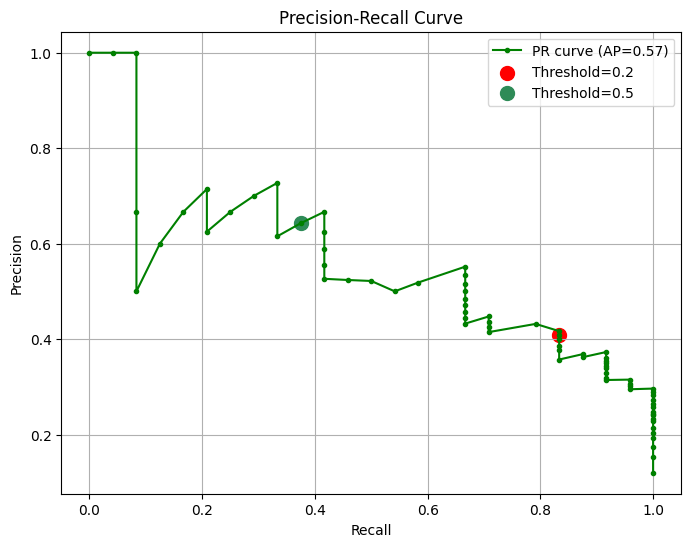

In [246]:
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt
import numpy as np

# Get predicted probabilities for churners (class 1)
y_proba = model.predict_proba(X_test)[:, 1]

# Compute precision-recall pairs for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Compute average precision (area under PR curve)
avg_precision = average_precision_score(y_test, y_proba)

# Plot Precision-Recall curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.', color='green', label=f'PR curve (AP={avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

# Key thresholds 0.2, and 0.5 for comparison
colors={0.2: 'red', 0.5: 'seagreen'}
for thresh in [0.2, 0.5]:
    idx = np.argmin(np.abs(thresholds - thresh))
    plt.scatter(recall[idx], precision[idx], s=100, marker='o', color=colors[thresh], label=f'Threshold={thresh}')

plt.legend()
plt.grid(True)
plt.show()